## 파이썬 고급
# Pandas 로 지하철 데이터 분석

- 서울 열린데이터 광장 (http://data.seoul.go.kr)
- http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-12914&srvType=S&serviceKind=1&currentPageNo=1&searchValue=&searchKey=null
- 교통카드(선후불교통카드 및 1회용 교통카드)를 이용한 지하철호선별 역별(서울교통공사, 한국철도공사, 공항철도, 9호선) 승하차인원을 나타내는 정보입니다. (일단위)<br>
※ Sheet 서비스는 마지막 한달치 데이터만 서비스 합니다.(* 데이터 적재는 매일 3일전 데이터를 갱신합니다.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('CARD_SUBWAY_MONTH_201905.csv')

In [13]:
#data.head(20)
data.tail()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
17741,20190531,수인선,1885,연수,6405,6455,20190603
17742,20190531,수인선,1884,원인재,5465,5571,20190603
17743,20190531,수인선,1883,남동인더스파크,2582,2910,20190603
17744,20190531,8호선,2822,산성,7161,6841,20190603
17745,20190531,중앙선,1220,지평,66,84,20190603


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17746 entries, 0 to 17745
Data columns (total 7 columns):
사용일자      17746 non-null int64
노선명       17746 non-null object
역ID       17746 non-null int64
역명        17746 non-null object
승차총승객수    17746 non-null int64
하차총승객수    17746 non-null int64
등록일자      17746 non-null int64
dtypes: int64(5), object(2)
memory usage: 970.6+ KB


In [5]:
data.describe()

,사용일자,역ID,승차총승객수,하차총승객수,등록일자
count,1.774600e+04,17746.000000,17746.000000,17746.000000,1.774600e+04
mean,2.019052e+07,1882.308971,13313.817424,13261.872985,2.019053e+07
std,8.936686e+00,1179.062129,13347.911600,13602.842430,2.654490e+01
min,2.019050e+07,150.000000,1.000000,0.000000,2.019050e+07
25%,2.019051e+07,1030.000000,4584.000000,4354.000000,2.019051e+07
50%,2.019052e+07,1812.000000,9474.000000,9243.000000,2.019052e+07
75%,2.019052e+07,2634.000000,17406.000000,17558.750000,2.019053e+07
max,2.019053e+07,4713.000000,122649.000000,139617.000000,2.019060e+07


In [6]:
data.index

RangeIndex(start=0, stop=17746, step=1)

In [7]:
data.columns

Index(['사용일자', '노선명', '역ID', '역명', '승차총승객수', '하차총승객수', '등록일자'], dtype='object')

In [8]:
data['사용일자']
data.사용일자

0        20190501
1        20190501
2        20190501
3        20190501
4        20190501
5        20190501
6        20190501
7        20190501
8        20190501
9        20190501
10       20190501
11       20190501
12       20190501
13       20190501
14       20190501
15       20190501
16       20190501
17       20190501
18       20190501
19       20190501
20       20190501
21       20190501
22       20190501
23       20190501
24       20190501
25       20190501
26       20190501
27       20190501
28       20190501
29       20190501
           ...   
17716    20190531
17717    20190531
17718    20190531
17719    20190531
17720    20190531
17721    20190531
17722    20190531
17723    20190531
17724    20190531
17725    20190531
17726    20190531
17727    20190531
17728    20190531
17729    20190531
17730    20190531
17731    20190531
17732    20190531
17733    20190531
17734    20190531
17735    20190531
17736    20190531
17737    20190531
17738    20190531
17739    20190531
17740    2

In [9]:
data.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190501,일산선,1955,마두,8528,8796,20190504
1,20190501,일산선,1954,백석,10118,10399,20190504
2,20190501,일산선,1953,대곡,1655,1406,20190504
3,20190501,일산선,1952,화정,20102,20951,20190504
4,20190501,일산선,1951,원당,11419,11064,20190504


In [10]:
data2 = data[ ['승차총승객수','하차총승객수'] ]
data2.head()

,승차총승객수,하차총승객수
0,8528,8796
1,10118,10399
2,1655,1406
3,20102,20951
4,11419,11064


In [11]:
data2.values

array([[ 8528,  8796],
       [10118, 10399],
       [ 1655,  1406],
       ...,
       [ 2582,  2910],
       [ 7161,  6841],
       [   66,    84]], dtype=int64)

In [12]:
data[data.승차총승객수<10] # () & ()           () | ()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
72,20190501,분당선,1031,복정,1,0,20190504
141,20190501,경의선,1295,김포공항,1,0,20190504
253,20190501,3호선,321,충무로,1,0,20190504
356,20190501,6호선,2615,연신내,2,0,20190504
562,20190501,경원선,1022,창동,1,0,20190504
675,20190502,3호선,321,충무로,3,0,20190505
856,20190502,분당선,1031,복정,1,0,20190505
924,20190502,경의선,1297,검암,1,0,20190505
925,20190502,경의선,1296,계양,1,0,20190505
926,20190502,경의선,1291,서울역,1,0,20190505


In [34]:
data[(data.승차총승객수>100) & (data.하차총승객수>100) &
    (np.abs(data.승차총승객수-data.하차총승객수)>(data.승차총승객수))]

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
1573,20190503,경춘선,1320,대성리,812,3488,20190506
2087,20190504,4호선,426,서울역,9982,26041,20190507
2659,20190505,4호선,426,서울역,8225,18994,20190508
3058,20190506,4호선,426,서울역,7030,18084,20190509
3516,20190506,장항선,1408,신창(순천향대),1677,3515,20190509
5478,20190510,경춘선,1320,대성리,927,4143,20190513
6078,20190511,4호선,426,서울역,9572,23702,20190514
6588,20190512,장항선,1408,신창(순천향대),1457,3132,20190515
6739,20190512,4호선,426,서울역,7388,17308,20190515
9931,20190517,경춘선,1320,대성리,1122,2403,20190520


In [20]:
{day: data[data.사용일자==day].shape[0] for day in range(20190501,20190532)}

{20190501: 593,
 20190502: 593,
 20190503: 593,
 20190504: 591,
 20190505: 591,
 20190506: 592,
 20190507: 590,
 20190508: 592,
 20190509: 591,
 20190510: 591,
 20190511: 592,
 20190512: 590,
 20190513: 592,
 20190514: 592,
 20190515: 592,
 20190516: 593,
 20190517: 593,
 20190518: 591,
 20190519: 591,
 20190520: 592,
 20190521: 592,
 20190522: 590,
 20190523: 593,
 20190524: 592,
 20190525: 0,
 20190526: 592,
 20190527: 590,
 20190528: 591,
 20190529: 590,
 20190530: 591,
 20190531: 590}

In [23]:
data.isnull() # data.notnull()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [22]:
data.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
17716    0
17717    0
17718    0
17719    0
17720    0
17721    0
17722    0
17723    0
17724    0
17725    0
17726    0
17727    0
17728    0
17729    0
17730    0
17731    0
17732    0
17733    0
17734    0
17735    0
17736    0
17737    0
17738    0
17739    0
17740    0
17741    0
17742    0
17743    0
17744    0
17745    0
Length: 17746, dtype: int64

In [25]:
data[['승차총승객수','하차총승객수']].mean()

승차총승객수    13313.817424
하차총승객수    13261.872985
dtype: float64

In [24]:
data.mean()[['승차총승객수','하차총승객수']]

승차총승객수    13313.817424
하차총승객수    13261.872985
dtype: float64

In [26]:
data.notnull().sum()

사용일자      17746
노선명       17746
역ID       17746
역명        17746
승차총승객수    17746
하차총승객수    17746
등록일자      17746
dtype: int64

In [27]:
data.notnull().mean()

사용일자      1.0
노선명       1.0
역ID       1.0
역명        1.0
승차총승객수    1.0
하차총승객수    1.0
등록일자      1.0
dtype: float64

In [21]:
# ser.name, df.index.name, df.columns.name

In [35]:
pd.to_datetime(['20190308'])
pd.to_datetime([20190308])

DatetimeIndex(['1970-01-01 00:00:00.020190308'], dtype='datetime64[ns]', freq=None)

In [36]:
data2 = data.copy()

# data2['year'] = data2.사용일자//10000
# data2['month'] = (data2.사용일자%10000)//100
# data2['day'] = data2.사용일자%100
# import calendar
#data2['wday'] = data2.apply(lambda ser: calendar.weekday(ser.year, ser.month, ser.day),axis=1)

theday = pd.to_datetime(data2.사용일자, format='%Y%m%d') # 교재 426쪽 표
theday

0       2019-01-01
1       2019-01-01
2       2019-01-01
3       2019-01-01
4       2019-01-01
5       2019-01-01
6       2019-01-01
7       2019-01-01
8       2019-01-01
9       2019-01-01
10      2019-01-01
11      2019-01-01
12      2019-01-01
13      2019-01-01
14      2019-01-01
15      2019-01-01
16      2019-01-01
17      2019-01-01
18      2019-01-01
19      2019-01-01
20      2019-01-01
21      2019-01-01
22      2019-01-01
23      2019-01-01
24      2019-01-01
25      2019-01-01
26      2019-01-01
27      2019-01-01
28      2019-01-01
29      2019-01-01
           ...    
18304   2019-01-31
18305   2019-01-31
18306   2019-01-31
18307   2019-01-31
18308   2019-01-31
18309   2019-01-31
18310   2019-01-31
18311   2019-01-31
18312   2019-01-31
18313   2019-01-31
18314   2019-01-31
18315   2019-01-31
18316   2019-01-31
18317   2019-01-31
18318   2019-01-31
18319   2019-01-31
18320   2019-01-31
18321   2019-01-31
18322   2019-01-31
18323   2019-01-31
18324   2019-01-31
18325   2019

In [44]:
s = pd.Series(['hong','jang'])
s.str.upper()

0    HONG
1    JANG
dtype: object

In [42]:
ser = pd.Series(['4/1/2020', '4/2/2020'])
ser = pd.to_datetime(ser)

In [43]:
ser.dt.year

0    2020
1    2020
dtype: int64

In [45]:
ser.dt.dayofweek

0    2
1    3
dtype: int64

In [46]:
data2 = data.copy()
theday = pd.to_datetime(data2.사용일자, format='%Y%m%d')

data2['year'] = theday.dt.year
data2['month'] = theday.dt.month
data2['day'] = theday.dt.day
wday={0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
data2['wday'] = theday.dt.dayofweek.map(wday)

data2.tail()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,year,month,day,wday
17741,20190531,수인선,1885,연수,6405,6455,20190603,2019,5,31,금
17742,20190531,수인선,1884,원인재,5465,5571,20190603,2019,5,31,금
17743,20190531,수인선,1883,남동인더스파크,2582,2910,20190603,2019,5,31,금
17744,20190531,8호선,2822,산성,7161,6841,20190603,2019,5,31,금
17745,20190531,중앙선,1220,지평,66,84,20190603,2019,5,31,금


In [47]:
# 빠진 날자 확인
set(range(1,32)) - set(data2.day)

{25}

In [39]:
data3 = data2.drop('year', axis=1)[:3] # return new DataFrame
data3

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,month,day,wday
0,20190101,경춘선,1323,가평,1520,1436,20190104,1,1,화
1,20190101,경춘선,1322,상천,275,114,20190104,1,1,화
2,20190101,경춘선,1321,청평,1509,1083,20190104,1,1,화


In [48]:
data2[data2.wday=='월'].head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,year,month,day,wday
2961,20190506,2호선,205,동대문역사문화공원,16960,19207,20190509,2019,5,6,월
2962,20190506,2호선,206,신당,11279,11908,20190509,2019,5,6,월
2963,20190506,2호선,207,상왕십리,9326,9395,20190509,2019,5,6,월
2964,20190506,2호선,208,왕십리(성동구청),14436,12882,20190509,2019,5,6,월
2965,20190506,2호선,209,한양대,4831,5884,20190509,2019,5,6,월


In [49]:
data2[['승차총승객수','하차총승객수']] # DataFrame - Series

,승차총승객수,하차총승객수
0,8528,8796
1,10118,10399
2,1655,1406
3,20102,20951
4,11419,11064
5,16289,15724
6,7565,7223
7,1868,1879
8,1619,1575
9,4027,4496


In [50]:
data2[['승차총승객수','하차총승객수']] - [10000,10000] # DataFrame - Series

,승차총승객수,하차총승객수
0,-1472,-1204
1,118,399
2,-8345,-8594
3,10102,10951
4,1419,1064
5,6289,5724
6,-2435,-2777
7,-8132,-8121
8,-8381,-8425
9,-5973,-5504


In [52]:
data3 = data2[['승차총승객수','하차총승객수']]
data3[:3]

,승차총승객수,하차총승객수
0,8528,8796
1,10118,10399
2,1655,1406


In [50]:
np.maximum(data3,10000)

,승차총승객수,하차총승객수
0,10000,10000
1,10000,10000
2,10000,10000
3,10000,10000
4,10000,10000
5,10000,10000
6,10000,10000
7,10000,10000
8,10000,10000
9,10000,10000


In [51]:
data3.apply(np.sin)

,승차총승객수,하차총승객수
0,-0.506262,-0.288019
1,-0.993885,0.784980
2,0.860131,0.750928
3,-0.909285,0.733211
4,0.141269,0.475391
5,0.999518,-0.999754
6,-0.595102,-0.070963
7,-0.905553,-0.287961
8,0.676683,0.785055
9,0.498609,0.983566


In [56]:
data3.apply(lambda ser: ser.max() - ser.min())

승차총승객수    132726
하차총승객수    137826
dtype: int64

In [53]:
data3.apply(lambda ser: pd.Series([ser.max(), ser.min(), ser.mean(), ser.std()],
                index=['max','min','mean','std']))

,승차총승객수,하차총승객수
max,122649.000000,139617.000000
min,1.000000,0.000000
mean,13313.817424,13261.872985
std,13347.911600,13602.842430


In [54]:
data3 - data3.min()

,승차총승객수,하차총승객수
0,8527,8796
1,10117,10399
2,1654,1406
3,20101,20951
4,11418,11064
5,16288,15724
6,7564,7223
7,1867,1879
8,1618,1575
9,4026,4496


In [71]:
data3.apply(lambda col: col - col.min(), axis=1)

,승차총승객수,하차총승객수
0,84,0
1,161,0
2,426,0
3,86,0
4,0,191
5,22,0
6,0,12
7,8,0
8,0,187
9,26,0


In [57]:
data3.applymap(lambda x: x//10000 + np.random.randn())

,승차총승객수,하차총승객수
0,-1.078179,1.029334
1,1.566813,-0.730750
2,-1.154670,0.517174
3,0.786613,3.488507
4,2.007304,1.946588
5,1.888688,1.177144
6,1.263243,2.206599
7,0.476117,1.746740
8,1.481284,-1.160422
9,0.668997,-0.549903


In [61]:
data3//10000 + np.random.randn(17746,2)

,승차총승객수,하차총승객수
0,-0.637261,1.112147
1,0.057730,0.267329
2,0.434746,0.100548
3,2.539652,1.070603
4,1.787886,0.694445
5,1.717661,3.479377
6,-0.037365,0.098033
7,-1.124088,-1.544341
8,-1.636673,0.085997
9,1.385830,-1.580475


- Series.apply()
- Series.map()
- DataFrame.apply() # for each column
- DataFrame.applymap() # for each value

In [62]:
s = pd.Series([1,0,2,4,6,3])
s.map({0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'})

0    화
1    월
2    수
3    금
4    일
5    목
dtype: object

In [63]:
data.sort_values('승차총승객수', ascending=False)

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
5591,20190510,2호선,222,강남,122649,127571,20190513
2001,20190504,2호선,216,잠실(송파구청),122249,139617,20190507
1405,20190503,2호선,222,강남,122038,127625,20190506
13684,20190524,2호선,222,강남,120746,124982,20190527
9707,20190517,2호선,222,강남,119461,124359,20190520
17695,20190531,2호선,222,강남,115845,120454,20190603
9206,20190516,2호선,222,강남,114067,114323,20190519
8831,20190515,2호선,222,강남,113431,114449,20190518
716,20190502,2호선,222,강남,113101,114737,20190505
4820,20190509,2호선,222,강남,112428,113596,20190512


In [66]:
data.sort_values('승차총승객수')

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
8354,20190515,경원선,1022,창동,1,0,20190518
14580,20190526,경원선,1022,창동,1,0,20190529
3365,20190506,경의선,1296,계양,1,0,20190509
2620,20190505,3호선,321,충무로,1,0,20190508
8397,20190515,경의선,1296,계양,1,0,20190518
6417,20190511,경의선,1294,디지털미디어시티,1,0,20190514
10449,20190518,6호선,2615,연신내,1,0,20190521
13438,20190523,경의선,1297,검암,1,0,20190526
6376,20190511,경원선,1022,창동,1,0,20190514
13826,20190524,6호선,2615,연신내,1,0,20190527


In [64]:
data3.idxmax()

승차총승객수    5591
하차총승객수    2001
dtype: int64

In [65]:
data3.iloc[5960]

승차총승객수    5573
하차총승객수    5220
Name: 5960, dtype: int64

In [53]:
data.iloc[:10, [0,3]]

,사용일자,역명
0,20190101,가평
1,20190101,상천
2,20190101,청평
3,20190101,대성리
4,20190101,마석
5,20190101,천마산
6,20190101,평내호평
7,20190101,금곡
8,20190101,사릉
9,20190101,퇴계원


In [67]:
#data[data.isnull()] = 0
data.count()

사용일자      17746
노선명       17746
역ID       17746
역명        17746
승차총승객수    17746
하차총승객수    17746
등록일자      17746
dtype: int64

### Datetime 으로 변환

In [102]:
pd.to_datetime(data.사용일자,format='%Y%m%d') # data.사용일자.astype(str) 으로 변환하지 않아도 됨

0       2019-01-01
1       2019-01-01
2       2019-01-01
3       2019-01-01
4       2019-01-01
5       2019-01-01
6       2019-01-01
7       2019-01-01
8       2019-01-01
9       2019-01-01
10      2019-01-01
11      2019-01-01
12      2019-01-01
13      2019-01-01
14      2019-01-01
15      2019-01-01
16      2019-01-01
17      2019-01-01
18      2019-01-01
19      2019-01-01
20      2019-01-01
21      2019-01-01
22      2019-01-01
23      2019-01-01
24      2019-01-01
25      2019-01-01
26      2019-01-01
27      2019-01-01
28      2019-01-01
29      2019-01-01
           ...    
18304   2019-01-31
18305   2019-01-31
18306   2019-01-31
18307   2019-01-31
18308   2019-01-31
18309   2019-01-31
18310   2019-01-31
18311   2019-01-31
18312   2019-01-31
18313   2019-01-31
18314   2019-01-31
18315   2019-01-31
18316   2019-01-31
18317   2019-01-31
18318   2019-01-31
18319   2019-01-31
18320   2019-01-31
18321   2019-01-31
18322   2019-01-31
18323   2019-01-31
18324   2019-01-31
18325   2019

In [106]:
data.역명.str.len()

0         2
1         2
2         2
3         3
4         2
5         3
6         4
7         2
8         2
9         3
10        2
11        2
12        2
13        2
14        3
15        2
16        2
17        2
18        2
19        2
20        2
21        2
22        2
23        2
24        2
25        2
26        2
27        2
28        2
29        2
         ..
18304     2
18305     2
18306     8
18307     5
18308     4
18309     8
18310     4
18311    10
18312     8
18313     4
18314     2
18315     2
18316     3
18317     9
18318     4
18319     2
18320     9
18321     5
18322     5
18323     5
18324     2
18325     3
18326    12
18327     3
18328     3
18329     3
18330     4
18331     4
18332     2
18333     2
Name: 역명, Length: 18334, dtype: int64

### 상관관계

In [107]:
data3.corr()

,승차총승객수,하차총승객수
승차총승객수,1.000000,0.994333
하차총승객수,0.994333,1.000000


In [108]:
data3.cov()

,승차총승객수,하차총승객수
승차총승객수,1.681945e+08,1.696511e+08
하차총승객수,1.696511e+08,1.730764e+08


In [109]:
data.head() # data.tail()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,경춘선,1323,가평,1520,1436,20190104
1,20190101,경춘선,1322,상천,275,114,20190104
2,20190101,경춘선,1321,청평,1509,1083,20190104
3,20190101,경춘선,1320,대성리,357,271,20190104
4,20190101,경춘선,1319,마석,1772,1963,20190104


In [68]:
data.노선명.unique() # numpy array 출력

array(['일산선', '우이신설선', '안산선', '수인선', '분당선', '과천선', '공항철도 1호선', '경춘선',
       '경인선', '경의선', '장항선', '중앙선', '1호선', '2호선', '3호선', '4호선', '5호선',
       '6호선', '7호선', '8호선', '9호선', '9호선2~3단계', '경강선', '경부선', '경원선'],
      dtype=object)

In [69]:
np.sort(data.노선명.unique())

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선',
       '과천선', '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선'],
      dtype=object)

In [70]:
np.sort(data.역명.unique())

array(['4.19민주묘지', '가능', '가락시장', '가산디지털단지', '가양', '가오리', '가좌', '가천대',
       '가평', '간석', '갈매', '강남', '강남구청', '강동', '강동구청', '강매', '강변(동서울터미널)',
       '강촌', '개롱', '개봉', '개포동', '개화', '개화산', '거여', '건대입구', '검암', '경기광주',
       '경마공원', '경복궁(정부서울청사)', '경찰병원', '계양', '고덕', '고려대(종암)', '고속터미널',
       '고잔', '곡산', '곤지암', '공덕', '공릉(서울과학기술대)', '공항시장', '공항화물청사', '과천',
       '관악', '광나루(장신대)', '광명', '광명사거리', '광운대', '광화문(세종문화회관)', '광흥창(서강)',
       '교대(법원.검찰청)', '구로', '구로디지털단지', '구룡', '구리', '구반포', '구산', '구성',
       '구의(광진구청)', '구일', '구파발', '국수', '국회의사당', '군자(능동)', '군포', '굴봉산',
       '굴포천', '굽은다리(강동구민회관앞)', '금곡', '금릉', '금정', '금천구청', '금촌', '금호', '기흥',
       '길동', '길음', '김유정', '김포공항', '까치산', '까치울', '낙성대', '남구로', '남동인더스파크',
       '남부터미널(예술의전당)', '남성', '남영', '남춘천', '남태령', '남한산성입구(성남법원.검찰청)', '내방',
       '노들', '노량진', '노원', '녹번', '녹사평(용산구청)', '녹양', '녹천', '논현', '능곡',
       '단대오거리', '달월', '답십리', '당고개', '당산', '당정', '대곡', '대공원', '대림(구로구청)',
       '대모산입구', '대방', '대성리', '대야미', '대청', '대치', '대화', '대흥(서강대앞)', 

In [119]:
data.노선명.value_counts()

5호선         1581
7호선         1581
2호선         1550
경부선         1209
6호선         1164
분당선         1071
3호선         1049
경원선          912
경의선          806
4호선          806
9호선          775
중앙선          651
경인선          620
경춘선          589
8호선          527
공항철도 1호선     434
수인선          403
9호선2~3단계     403
안산선          403
우이신설선        403
경강선          341
일산선          312
1호선          310
과천선          248
장항선          186
Name: 노선명, dtype: int64

In [72]:
s = data.역명.value_counts()
s[s%30 !=0]

서울역         157
김포공항        101
디지털미디어시티     91
충무로          57
복정           48
창동           47
연신내          44
계양           37
검암           34
Name: 역명, dtype: int64

In [74]:
data[data.역명=='가산디지털단지']

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
427,20190501,7호선,2748,가산디지털단지,21411,20278,20190504
519,20190501,경부선,1702,가산디지털단지,8471,10810,20190504
1003,20190502,7호선,2748,가산디지털단지,50590,51301,20190505
1018,20190502,경부선,1702,가산디지털단지,20890,24482,20190505
1316,20190503,7호선,2748,가산디지털단지,50656,50376,20190506
1702,20190503,경부선,1702,가산디지털단지,20776,24102,20190506
2221,20190504,7호선,2748,가산디지털단지,19613,17582,20190507
2345,20190504,경부선,1702,가산디지털단지,7580,10486,20190507
2794,20190505,7호선,2748,가산디지털단지,16274,14379,20190508
2883,20190505,경부선,1702,가산디지털단지,6706,9225,20190508


In [129]:
data.isin(['대성리']).head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False


### NaN
- dropna()
- fillna()
- isnull()
- notnull()

### 인덱스 설정
- set_index()
- reset_index()
- reindex()
- rename() # 인덱스와 칼럼의 명칭 바꾸기

In [137]:
d = pd.DataFrame(np.arange(12).reshape(4,3))
d

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


In [148]:
d.drop([1,2]).reset_index(drop=True)

,0,1,2
0,0,1,2
1,9,10,11


In [151]:
data.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,경춘선,1323,가평,1520,1436,20190104
1,20190101,경춘선,1322,상천,275,114,20190104
2,20190101,경춘선,1321,청평,1509,1083,20190104
3,20190101,경춘선,1320,대성리,357,271,20190104
4,20190101,경춘선,1319,마석,1772,1963,20190104


In [75]:
p = pd.pivot_table(data, values='승차총승객수', index='사용일자', columns='노선명',
                   aggfunc=np.mean).reset_index()

wday={0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
p.insert(1, '요일', pd.to_datetime(p.사용일자, format='%Y%m%d').dt.dayofweek.map(wday))
p

노선명,사용일자,요일,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,...,경춘선,공항철도 1호선,과천선,분당선,수인선,안산선,우이신설선,일산선,장항선,중앙선
0,20190501,수,26586.2,26205.46,14780.441176,22080.538462,10283.941176,8787.105263,12055.745098,9814.823529,...,2136.105263,7554.785714,13124.625,9170.942857,3691.615385,9921.923077,3407.692308,11585.6,2758.333333,4717.238095
1,20190502,목,31723.1,36089.48,19374.647059,26513.615385,14314.647059,11436.675676,16861.274510,13338.294118,...,2508.842105,9525.857143,16327.125,12562.200000,4197.615385,12009.076923,4051.769231,14129.5,3307.166667,5652.238095
2,20190503,금,33493.3,38188.92,20885.205882,27510.961538,14889.607843,11514.605263,17323.764706,13891.764706,...,2644.684211,10096.000000,18103.375,13171.257143,4520.153846,12651.076923,4089.538462,14547.3,3556.666667,5992.333333
3,20190504,토,32165.7,29361.76,16081.000000,21385.346154,10521.882353,8668.891892,12274.843137,11180.235294,...,2462.315789,8018.285714,13815.250,9540.485714,3350.538462,10088.769231,3144.692308,11608.4,3043.000000,4919.095238
4,20190505,일,21338.9,20642.58,11257.235294,15897.307692,7779.764706,6604.157895,9265.921569,7198.941176,...,2146.210526,6961.142857,13041.125,6944.794118,2875.461538,8700.307692,2677.307692,9381.6,2191.333333,4125.904762
5,20190506,월,21101.5,20586.30,11978.794118,16429.500000,7984.901961,6595.157895,9728.666667,7535.117647,...,2214.578947,6998.714286,9683.000,7028.457143,2909.307692,8509.000000,2633.307692,9367.3,2586.500000,4040.333333
6,20190507,화,30129.6,34488.86,19346.636364,25286.769231,13923.294118,11029.918919,16767.549020,13159.823529,...,2425.684211,8819.428571,15386.000,12808.058824,4164.923077,11670.461538,4047.846154,13658.3,3223.833333,5475.238095
7,20190508,수,29656.9,34543.44,18827.558824,25253.269231,14148.490196,10924.842105,16876.196078,13208.058824,...,2359.263158,8628.571429,16020.250,12493.000000,4240.230769,11811.769231,4004.538462,13412.5,2943.333333,5509.000000
8,20190509,목,30711.5,35541.66,19281.264706,26013.346154,14251.333333,11316.081081,16925.098039,13460.235294,...,2386.368421,8806.071429,15883.750,13306.264706,4308.307692,11800.846154,3999.230769,13830.6,3582.500000,5530.904762
9,20190510,금,32392.0,37759.08,20605.911765,27101.846154,14853.647059,11723.324324,17532.156863,13885.705882,...,2585.157895,9708.571429,18341.875,13698.500000,4414.076923,12383.461538,4076.923077,14771.0,3513.166667,5929.666667


In [94]:
p.shape

(30, 27)

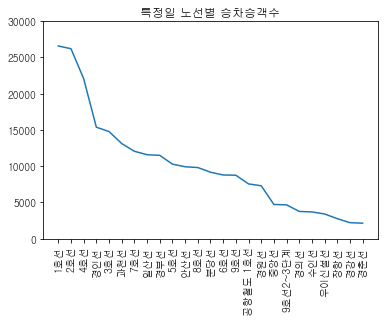

In [95]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/NGULIM.TTF").get_name()
rc('font', family=font_name)

#p.iloc[0,2:].plot()
#plt.plot(p.iloc[0,2:])
ss = p.iloc[0,2:].sort_values(ascending=False)
plt.plot(ss.values)
plt.xticks(range(25), ss.index, rotation=90)
plt.ylim(0,30000)
plt.title('특정일 노선별 승차승객수')
pass

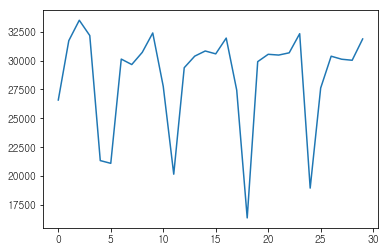

In [97]:
plt.plot(p['1호선'])

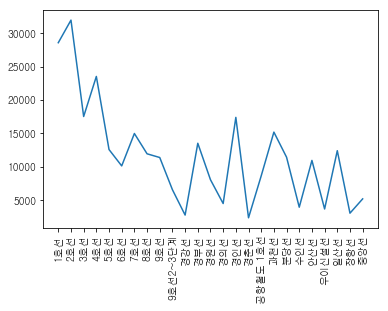

In [100]:
plt.plot(p.iloc[:,2:].mean())
plt.xticks(rotation=90)
pass

In [89]:
p.iloc[0,2:].sort_values(ascending=False)

노선명
1호선         26586.2
2호선         26205.5
4호선         22080.5
경인선         15379.7
3호선         14780.4
과천선         13124.6
7호선         12055.7
일산선         11585.6
경부선         11498.4
5호선         10283.9
안산선         9921.92
8호선         9814.82
분당선         9170.94
6호선         8787.11
9호선         8755.68
공항철도 1호선    7554.79
경원선          7300.5
중앙선         4717.24
9호선2~3단계    4664.69
경의선         3756.73
수인선         3691.62
우이신설선       3407.69
장항선         2758.33
경강선         2208.27
경춘선         2136.11
Name: 0, dtype: object

In [175]:
dt = pd.to_datetime(data.사용일자, format='%Y%m%d')
dt.head()

0   2019-01-01
1   2019-01-01
2   2019-01-01
3   2019-01-01
4   2019-01-01
Name: 사용일자, dtype: datetime64[ns]

In [157]:
dt.dt.dayofweek # 0 이 월요일

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
18304    3
18305    3
18306    3
18307    3
18308    3
18309    3
18310    3
18311    3
18312    3
18313    3
18314    3
18315    3
18316    3
18317    3
18318    3
18319    3
18320    3
18321    3
18322    3
18323    3
18324    3
18325    3
18326    3
18327    3
18328    3
18329    3
18330    3
18331    3
18332    3
18333    3
Name: 사용일자, Length: 18334, dtype: int64

### 노선명 코드화

In [101]:
np.sort(data.노선명.unique())

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선',
       '과천선', '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선'],
      dtype=object)

In [107]:
c1 = dict(enumerate(np.sort(data.노선명.unique())))
c2 = {v:k for k,v in c1.items()}
c2 = {c1[k]:k for k in c1}
c2

{'1호선': 0,
 '2호선': 1,
 '3호선': 2,
 '4호선': 3,
 '5호선': 4,
 '6호선': 5,
 '7호선': 6,
 '8호선': 7,
 '9호선': 8,
 '9호선2~3단계': 9,
 '경강선': 10,
 '경부선': 11,
 '경원선': 12,
 '경의선': 13,
 '경인선': 14,
 '경춘선': 15,
 '공항철도 1호선': 16,
 '과천선': 17,
 '분당선': 18,
 '수인선': 19,
 '안산선': 20,
 '우이신설선': 21,
 '일산선': 22,
 '장항선': 23,
 '중앙선': 24}

In [109]:
pd.Series(c2)

1호선          0
2호선          1
3호선          2
4호선          3
5호선          4
6호선          5
7호선          6
8호선          7
9호선          8
9호선2~3단계     9
경강선         10
경부선         11
경원선         12
경의선         13
경인선         14
경춘선         15
공항철도 1호선    16
과천선         17
분당선         18
수인선         19
안산선         20
우이신설선       21
일산선         22
장항선         23
중앙선         24
dtype: int64

In [231]:
line_name = np.sort(data.노선명.unique())
line_code = pd.DataFrame(list(enumerate(line_name)), columns=['노선코드','노선명'])
line_code

,노선코드,노선명
0,0,1호선
1,1,2호선
2,2,3호선
3,3,4호선
4,4,5호선
5,5,6호선
6,6,7호선
7,7,8호선
8,8,9호선
9,9,9호선2~3단계


In [110]:
s = data[['노선명','역ID']].drop_duplicates().노선명.value_counts()
s
#line_code['역수'] = line_code.노선명.map(s)
#line_code

5호선         51
7호선         51
2호선         50
경부선         39
6호선         38
분당선         35
3호선         34
경의선         30
경원선         30
4호선         26
9호선         25
중앙선         21
경인선         20
경춘선         19
8호선         17
공항철도 1호선    14
9호선2~3단계    13
우이신설선       13
수인선         13
안산선         13
경강선         11
일산선         10
1호선         10
과천선          8
장항선          6
Name: 노선명, dtype: int64

In [235]:
pd.merge(data.노선명.to_frame(),line_code)

,노선명,노선코드
0,경춘선,15
1,경춘선,15
2,경춘선,15
3,경춘선,15
4,경춘선,15
5,경춘선,15
6,경춘선,15
7,경춘선,15
8,경춘선,15
9,경춘선,15


In [237]:
line_code2 = pd.Series({s:i for i,s in enumerate(data.노선명.unique())})
line_code2

경춘선          0
경인선          1
경의선          2
경원선          3
경부선          4
2호선          5
경강선          6
수인선          7
분당선          8
9호선2~3단계     9
9호선         10
8호선         11
7호선         12
6호선         13
공항철도 1호선    14
5호선         15
4호선         16
3호선         17
1호선         18
중앙선         19
안산선         20
우이신설선       21
일산선         22
장항선         23
과천선         24
dtype: int64

In [238]:
data.노선명.map(line_code2)

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        1
13        1
14        1
15        1
16        2
17        2
18        2
19        2
20        2
21        2
22        2
23        2
24        2
25        2
26        2
27        2
28        2
29        2
         ..
18304     5
18305     5
18306     5
18307     5
18308     5
18309     5
18310     5
18311     5
18312     5
18313     5
18314     5
18315     5
18316     5
18317     5
18318     5
18319     5
18320     5
18321     5
18322     5
18323     5
18324     5
18325    18
18326    18
18327    18
18328    18
18329    18
18330    18
18331    18
18332    18
18333    18
Name: 노선명, Length: 18334, dtype: int64

### 역ID 코드 테이블

In [246]:
data[['역ID','역명','노선명']].values.tolist()

[[1323, '가평', '경춘선'],
 [1322, '상천', '경춘선'],
 [1321, '청평', '경춘선'],
 [1320, '대성리', '경춘선'],
 [1319, '마석', '경춘선'],
 [1318, '천마산', '경춘선'],
 [1317, '평내호평', '경춘선'],
 [1316, '금곡', '경춘선'],
 [1315, '사릉', '경춘선'],
 [1314, '퇴계원', '경춘선'],
 [1313, '별내', '경춘선'],
 [1312, '갈매', '경춘선'],
 [1804, '부천', '경인선'],
 [1803, '역곡', '경인선'],
 [1802, '오류동', '경인선'],
 [1801, '개봉', '경인선'],
 [1296, '계양', '경의선'],
 [1284, '문산', '경의선'],
 [1283, '파주', '경의선'],
 [1282, '월롱', '경의선'],
 [1280, '금촌', '경의선'],
 [1279, '금릉', '경의선'],
 [1278, '운정', '경의선'],
 [1277, '야당', '경의선'],
 [1276, '탄현', '경의선'],
 [1275, '일산', '경의선'],
 [1274, '풍산', '경의선'],
 [1273, '백마', '경의선'],
 [1272, '곡산', '경의선'],
 [1271, '능곡', '경의선'],
 [1270, '행신', '경의선'],
 [1269, '강매', '경의선'],
 [1268, '화전', '경의선'],
 [1267, '수색', '경의선'],
 [1266, '디지털미디어시티', '경의선'],
 [1265, '가좌', '경의선'],
 [1264, '홍대입구', '경의선'],
 [1263, '서강대', '경의선'],
 [1262, '공덕', '경의선'],
 [1261, '효창공원앞', '경의선'],
 [1252, '신촌', '경의선'],
 [1251, '서울역', '경의선'],
 [1916, '소요산', '경원선'],
 [1915, '동두천', '경원선'],
 [1914, '보산

In [122]:
station_code = data[['역ID','역명','노선명']].drop_duplicates().sort_values('역ID').reset_index(drop=True)
station_code

,역ID,역명,노선명
0,150,서울역,1호선
1,151,시청,1호선
2,152,종각,1호선
3,153,종로3가,1호선
4,154,종로5가,1호선
5,155,동대문,1호선
6,156,신설동,1호선
7,157,제기동,1호선
8,158,청량리(서울시립대입구),1호선
9,159,동묘앞,1호선


In [124]:
station_code[station_code.역명=='잠실(송파구청)']

,역ID,역명,노선명
25,216,잠실(송파구청),2호선
519,2815,잠실(송파구청),8호선


In [125]:
station_code.역명.value_counts()

서울역                 6
공덕                  4
디지털미디어시티            4
김포공항                4
종로3가                3
고속터미널               3
왕십리(성동구청)           3
신설동                 3
동대문역사문화공원           3
홍대입구                3
도곡                  2
신길                  2
가락시장                2
연신내                 2
오금                  2
신도림                 2
노량진                 2
불광                  2
시청                  2
이촌(국립중앙박물관)         2
이매                  2
선릉                  2
선정릉                 2
사당                  2
당산                  2
모란                  2
옥수                  2
청구                  2
성신여대입구(돈암)          2
동작(현충원)             2
                   ..
동대입구                1
마들                  1
서동탄                 1
운길산                 1
동두천                 1
광흥창(서강)             1
대흥(서강대앞)            1
구일                  1
안국                  1
이태원                 1
응봉                  1
상천                  1
수락산                 1
원인재                 1
신림        

In [128]:
data[data.역명=='시청']

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
182,20190501,1호선,151,시청,24025,27974,20190504
191,20190501,2호선,201,시청,18270,17925,20190504
737,20190502,2호선,201,시청,33144,32243,20190505
746,20190502,1호선,151,시청,32237,32071,20190505
1426,20190503,2호선,201,시청,33878,32974,20190506
1753,20190503,1호선,151,시청,32425,32731,20190506
1978,20190504,1호선,151,시청,24736,25818,20190507
1986,20190504,2호선,201,시청,18468,16152,20190507
2558,20190505,2호선,201,시청,11629,10395,20190508
2948,20190505,1호선,151,시청,15457,15413,20190508


In [139]:
station_code = data[['역ID','역명','노선명']].drop_duplicates().sort_values('역ID').reset_index(drop=True)
station_code

,역ID,역명,노선명
0,150,서울역,1호선
1,151,시청,1호선
2,152,종각,1호선
3,153,종로3가,1호선
4,154,종로5가,1호선
5,155,동대문,1호선
6,156,신설동,1호선
7,157,제기동,1호선
8,158,청량리(서울시립대입구),1호선
9,159,동묘앞,1호선


In [221]:
data.역ID.unique().shape

(598,)

In [140]:
s = station_code.역명.value_counts()
s[s>2]

서울역          6
공덕           4
디지털미디어시티     4
김포공항         4
종로3가         3
고속터미널        3
왕십리(성동구청)    3
신설동          3
동대문역사문화공원    3
홍대입구         3
Name: 역명, dtype: int64

In [141]:
station_code['노선수'] = station_code.역명.map(s)
station_code

,역ID,역명,노선명,노선수
0,150,서울역,1호선,6
1,151,시청,1호선,2
2,152,종각,1호선,1
3,153,종로3가,1호선,3
4,154,종로5가,1호선,1
5,155,동대문,1호선,2
6,156,신설동,1호선,3
7,157,제기동,1호선,1
8,158,청량리(서울시립대입구),1호선,2
9,159,동묘앞,1호선,2


In [136]:
data10 = data[['역ID', '역명', '노선명']].drop_duplicates().sort_values('역ID')
data10.head()

,역ID,역명,노선명
181,150,서울역,1호선
182,151,시청,1호선
183,152,종각,1호선
184,153,종로3가,1호선
185,154,종로5가,1호선


In [137]:
data10.역명.value_counts()
data10['노선수'] = data10.역명.map(data10.역명.value_counts())
data10.head()

,역ID,역명,노선명,노선수
181,150,서울역,1호선,6
182,151,시청,1호선,2
183,152,종각,1호선,1
184,153,종로3가,1호선,3
185,154,종로5가,1호선,1


In [142]:
station_code.sort_values(['노선수','역명'],ascending=False)

,역ID,역명,노선명,노선수
0,150,서울역,1호선,6
111,426,서울역,4호선,6
120,1001,서울역,경부선,6
171,1251,서울역,경의선,6
196,1291,서울역,경의선,6
570,4201,서울역,공항철도 1호선,6
178,1266,디지털미디어시티,경의선,4
197,1294,디지털미디어시티,경의선,4
434,2619,디지털미디어시티,6호선,4
573,4204,디지털미디어시티,공항철도 1호선,4


### Merge

In [145]:
s = data.groupby('역ID').mean()['승차총승객수']
s = data.groupby('역ID').승차총승객수.mean()
s

역ID
150     58614.300000
151     26583.000000
152     44789.400000
153     35668.133333
154     28045.866667
155     15798.200000
156     16815.100000
157     21018.066667
158     26348.333333
159     12011.300000
201     26308.500000
202     51300.166667
203     23711.366667
204     12539.766667
205     20354.733333
206     15674.933333
207     15167.333333
208     21401.433333
209     13586.000000
210     20328.033333
211     29757.666667
212     47773.733333
213     25292.133333
214     47253.866667
215     17368.433333
216     89212.333333
217     26351.733333
218     16596.000000
219     62287.866667
220     55384.133333
            ...     
4136     7413.333333
4137      992.766667
4138     7264.633333
4201    14180.533333
4202     2409.866667
4203    12950.900000
4204    13410.766667
4206     5492.866667
4207    10799.300000
4208    11720.233333
4209     8462.633333
4210     6772.000000
4211     7371.066667
4212     2439.400000
4213    16313.900000
4215     5534.000000
4217     

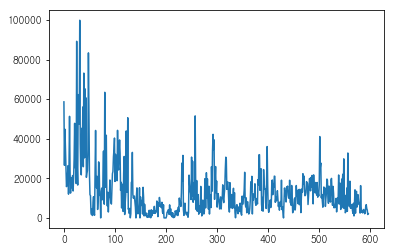

In [147]:
plt.plot(s.values)

In [272]:
data2 = pd.merge(data, s.to_frame(), left_on='역ID', right_index=True).sort_index()
data2

# data2 = data.copy()
# data2['승차평균'] = data2.역ID.map(s)
# data2

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,승차평균
0,20190101,경춘선,1323,가평,1520,1436,20190104,1792.548387
1,20190101,경춘선,1322,상천,275,114,20190104,290.870968
2,20190101,경춘선,1321,청평,1509,1083,20190104,1948.516129
3,20190101,경춘선,1320,대성리,357,271,20190104,575.806452
4,20190101,경춘선,1319,마석,1772,1963,20190104,3518.064516
5,20190101,경춘선,1318,천마산,787,765,20190104,1469.903226
6,20190101,경춘선,1317,평내호평,2649,2661,20190104,5584.741935
7,20190101,경춘선,1316,금곡,734,726,20190104,1456.129032
8,20190101,경춘선,1315,사릉,1347,1534,20190104,3257.161290
9,20190101,경춘선,1314,퇴계원,1542,1516,20190104,3450.967742


In [150]:
sn = (data.groupby('역명').승차총승객수.sum()//30).sort_values(ascending=False)
sn

역명
잠실(송파구청)        105299
고속터미널           100280
강남               99839
홍대입구             98579
서울역              98272
사당               76332
신림               73146
선릉               66308
구로디지털단지          65247
건대입구             65165
신도림              65043
종로3가             64027
삼성(무역센터)         62287
수원               61714
가산디지털단지          58168
서울대입구(관악구청)      56037
시청               52891
교대(법원.검찰청)       52844
을지로입구            51300
합정               50772
신촌               50722
영등포              50601
동대문역사문화공원        47389
역삼               47312
강변(동서울터미널)       47253
여의도              46493
노원               45798
청량리(서울시립대입구)     44804
종각               44789
왕십리(성동구청)        44520
                 ...  
천마산               1856
금곡                1780
남태령               1728
신답                1685
신둔도예촌             1536
봉명                1463
지축                1367
대성리               1274
배방                1206
도림천               1205
팔당                1194
운길산               1102
양정      

### concat()

In [287]:
df = pd.concat([data,data[['승차총승객수','하차총승객수']].mean(axis=1)], axis=1)
df.columns = df.columns[:-1].tolist()+['평균']
df

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,평균
0,20190101,경춘선,1323,가평,1520,1436,20190104,1478.0
1,20190101,경춘선,1322,상천,275,114,20190104,194.5
2,20190101,경춘선,1321,청평,1509,1083,20190104,1296.0
3,20190101,경춘선,1320,대성리,357,271,20190104,314.0
4,20190101,경춘선,1319,마석,1772,1963,20190104,1867.5
5,20190101,경춘선,1318,천마산,787,765,20190104,776.0
6,20190101,경춘선,1317,평내호평,2649,2661,20190104,2655.0
7,20190101,경춘선,1316,금곡,734,726,20190104,730.0
8,20190101,경춘선,1315,사릉,1347,1534,20190104,1440.5
9,20190101,경춘선,1314,퇴계원,1542,1516,20190104,1529.0


In [294]:
df2 = pd.concat([df, df], axis=1)
df2.shape, df.shape

((18334, 16), (18334, 8))

In [319]:
data.take([1,3,5])

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
1,20190101,경춘선,1322,상천,275,114,20190104
3,20190101,경춘선,1320,대성리,357,271,20190104
5,20190101,경춘선,1318,천마산,787,765,20190104


### get_dummies()

In [321]:
data.join(pd.get_dummies(data.노선명))

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,1호선,2호선,3호선,...,경춘선,공항철도 1호선,과천선,분당선,수인선,안산선,우이신설선,일산선,장항선,중앙선
0,20190101,경춘선,1323,가평,1520,1436,20190104,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,20190101,경춘선,1322,상천,275,114,20190104,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20190101,경춘선,1321,청평,1509,1083,20190104,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,20190101,경춘선,1320,대성리,357,271,20190104,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,20190101,경춘선,1319,마석,1772,1963,20190104,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,20190101,경춘선,1318,천마산,787,765,20190104,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,20190101,경춘선,1317,평내호평,2649,2661,20190104,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,20190101,경춘선,1316,금곡,734,726,20190104,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,20190101,경춘선,1315,사릉,1347,1534,20190104,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,20190101,경춘선,1314,퇴계원,1542,1516,20190104,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### String

In [335]:
station_code[station_code.역명.str.contains('\(')]

,역ID,역명,노선명,노선수
8,158,청량리(서울시립대입구),1호선,2
17,208,왕십리(성동구청),2호선,3
22,213,구의(광진구청),2호선,1
23,214,강변(동서울터미널),2호선,1
25,216,잠실(송파구청),2호선,2
28,219,삼성(무역센터),2호선,1
32,223,교대(법원.검찰청),2호선,2
37,228,서울대입구(관악구청),2호선,1
42,233,대림(구로구청),2호선,2
52,243,충정로(경기대입구),2호선,2


### 그룹

In [8]:
data.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,경춘선,1323,가평,1520,1436,20190104
1,20190101,경춘선,1322,상천,275,114,20190104
2,20190101,경춘선,1321,청평,1509,1083,20190104
3,20190101,경춘선,1320,대성리,357,271,20190104
4,20190101,경춘선,1319,마석,1772,1963,20190104


In [9]:
for key, df in data.groupby('사용일자'):
    display(key, df)
    break

20190101

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,경춘선,1323,가평,1520,1436,20190104
1,20190101,경춘선,1322,상천,275,114,20190104
2,20190101,경춘선,1321,청평,1509,1083,20190104
3,20190101,경춘선,1320,대성리,357,271,20190104
4,20190101,경춘선,1319,마석,1772,1963,20190104
5,20190101,경춘선,1318,천마산,787,765,20190104
6,20190101,경춘선,1317,평내호평,2649,2661,20190104
7,20190101,경춘선,1316,금곡,734,726,20190104
8,20190101,경춘선,1315,사릉,1347,1534,20190104
9,20190101,경춘선,1314,퇴계원,1542,1516,20190104


In [10]:
data.groupby('노선명').size()

노선명
1호선          310
2호선         1550
3호선         1049
4호선          806
5호선         1581
6호선         1164
7호선         1581
8호선          527
9호선          775
9호선2~3단계     403
경강선          341
경부선         1209
경원선          912
경의선          806
경인선          620
경춘선          589
공항철도 1호선     434
과천선          248
분당선         1071
수인선          403
안산선          403
우이신설선        403
일산선          312
장항선          186
중앙선          651
dtype: int64

In [11]:
data.dtypes

사용일자       int64
노선명       object
역ID        int64
역명        object
승차총승객수     int64
하차총승객수     int64
등록일자       int64
dtype: object

In [12]:
data[['노선명']]

,노선명
0,경춘선
1,경춘선
2,경춘선
3,경춘선
4,경춘선
5,경춘선
6,경춘선
7,경춘선
8,경춘선
9,경춘선


In [14]:
data.groupby('사용일자').agg(len) # size()

사용일자
20190101    592
20190102    592
20190103    593
20190104    590
20190105    589
20190106    590
20190107    592
20190108    591
20190109    591
20190110    591
20190111    592
20190112    592
20190113    592
20190114    592
20190115    591
20190116    592
20190117    591
20190118    591
20190119    591
20190120    592
20190121    593
20190122    591
20190123    590
20190124    592
20190125    589
20190126    591
20190127    592
20190128    592
20190129    593
20190130    593
20190131    591
dtype: int64

In [23]:
data.groupby('사용일자').agg(lambda df: df.max() - df.min())

,역ID,승차총승객수,하차총승객수,등록일자
사용일자,,,,
20190101,4563,70288,61834,0
20190102,4563,116549,116482,0
20190103,4563,122253,122889,0
20190104,4563,129877,134948,0
20190105,4563,93499,105472,0
20190106,4563,71524,69540,0
20190107,4563,121526,121092,0
20190108,4563,123558,123099,0
20190109,4563,123656,122365,0


In [27]:
data.groupby('노선명').agg(['mean', 'std']).승차총승객수

,mean,std
노선명,,
1호선,27714.254839,14872.985189
2호선,30257.951613,25011.375844
3호선,16306.236416,13897.214190
4호선,21121.942928,11142.280935
5호선,11566.161923,8244.471969
6호선,8968.502577,4824.543259
7호선,13568.542062,7473.634137
8호선,10888.738140,6002.298732
9호선,10686.589677,8853.881716


In [34]:
data.groupby('사용일자').apply(lambda df: df.sort_values('승차총승객수', ascending=False).head())

사용일자  노선명  역ID        역명  승차총승객수  하차총승객수      등록일자
사용일자                                                                  
20190101 394    20190101  2호선  239      홍대입구   70289   61834  20190104
         416    20190101  2호선  216  잠실(송파구청)   48502   42899  20190104
         362    20190101  3호선  329     고속터미널   44564   36579  20190104
         442    20190101  1호선  150       서울역   39420   31121  20190104
         410    20190101  2호선  222        강남   38729   36544  20190104
20190102 612    20190102  2호선  222        강남  116550  116482  20190105
         606    20190102  2호선  216  잠실(송파구청)   85771   82923  20190105
         638    20190102  2호선  239      홍대입구   77440   81728  20190105
         629    20190102  2호선  230        신림   73692   73265  20190105
         631    20190102  2호선  232   구로디지털단지   71046   70876  20190105
20190103 1740   20190103  2호선  222        강남  122254  122889  20190106
         1746   20190103  2호선  216  잠실(송파구청)   90798   87512  20190106
         1723   20190103  2호선  239      홍대입구   78897   83287  20190106
         1732   20190103  2호선  230        신림   75650   74677  20190106
         1730   20190103  2호선  232   구로디지털단지   72793   73191  20190106
20190104 1844   20190104  2호선  222        강남  129878  134948  20190107
         1799   20190104  2호선  216  잠실(송파구청)   95791   92454  20190107
         1861   20190104  2호선  239      홍대입구   87359   99468  20190107
         1852   20190104  2호선  230        신림   78947   77948  20190107
         1854   20190104  2호선  232   구로디지털단지   75632   75535  20190107
20190105 2434   20190105  2호선  239      홍대입구   93500  105472  20190108
         2417   20190105  2호선  222        강남   90030   95814  20190108
         2411   20190105  2호선  216  잠실(송파구청)   82719   77581  20190108
         2465   20190105  3호선  329     고속터미널   73516   69224  20190108
         2425   20190105  2호선  230        신림   62877   61460  20190108
20190106 3505   20190106  2호선  239      홍대입구   71525   69540  20190109
         3528   20190106  2호선  216  잠실(송파구청)   58948   54615  20190109
         3474   20190106  3호선  329     고속터미널   56373   53505  20190109
         3522   20190106  2호선  222        강남   52313   51169  20190109
         3514   20190106  2호선  230        신림   46899   46368  20190109
...                  ...  ...  ...       ...     ...     ...       ...
20190126 15322  20190126  2호선  239      홍대입구  101250  114445  20190129
         15339  20190126  2호선  222        강남   94215  100006  20190129
         15345  20190126  2호선  216  잠실(송파구청)   85821   80606  20190129
         15290  20190126  3호선  329     고속터미널   76622   72338  20190129
         15331  20190126  2호선  230        신림   65542   63867  20190129
20190127 15418  20190127  2호선  239      홍대입구   79507   78674  20190130
         15440  20190127  2호선  216  잠실(송파구청)   62329   57153  20190130
         15386  20190127  3호선  329     고속터미널   56866   55929  20190130
         15434  20190127  2호선  222        강남   55479   54361  20190130
         15426  20190127  2호선  230        신림   48952   47418  20190130
20190128 16015  20190128  2호선  222        강남  118690  118726  20190131
         16009  20190128  2호선  216  잠실(송파구청)   86842   84401  20190131
         16032  20190128  2호선  239      홍대입구   77425   79828  20190131
         16023  20190128  2호선  230        신림   75753   73885  20190131
         16025  20190128  2호선  232   구로디지털단지   73175   73065  20190131
20190129 17012  20190129  2호선  222        강남  120636  120632  20190201
         17006  20190129  2호선  216  잠실(송파구청)   90942   87560  20190201
         17020  20190129  2호선  230        신림   76392   74743  20190201
         17029  20190129  2호선  239      홍대입구   76168   79589  20190201
         17022  20190129  2호선  232   구로디지털단지   73940   74328  20190201
20190130 17713  20190130  2호선  222        강남  118278  118613  20190202
         17719  20190130  2호선  216  잠실(송파구청)   90059   87495  20190202
         17705  20190130  2호선  230        신림   76938   75507  20190202
         17696  20190130  2호선  239      홍대입구

In [36]:
data.groupby('사용일자', group_keys=False).apply(lambda df: df.sort_values('승차총승객수', ascending=False).head())

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
394,20190101,2호선,239,홍대입구,70289,61834,20190104
416,20190101,2호선,216,잠실(송파구청),48502,42899,20190104
362,20190101,3호선,329,고속터미널,44564,36579,20190104
442,20190101,1호선,150,서울역,39420,31121,20190104
410,20190101,2호선,222,강남,38729,36544,20190104
612,20190102,2호선,222,강남,116550,116482,20190105
606,20190102,2호선,216,잠실(송파구청),85771,82923,20190105
638,20190102,2호선,239,홍대입구,77440,81728,20190105
629,20190102,2호선,230,신림,73692,73265,20190105
631,20190102,2호선,232,구로디지털단지,71046,70876,20190105


In [ ]:
# dt = pd.to_datetime(data2.사용일자, format='%Y%m%d')
# data2['year'] = dt.dt.year
# data2['month'] = dt.dt.month
# data2['day'] = dt.dt.day
# wday={0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
# data2['wday'] = dt.dt.dayofweek.map(wday)

In [45]:
dt = pd.to_datetime(data.사용일자, format='%Y%m%d')
wday={0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
data.groupby(['노선명',dt.dt.dayofweek]).mean()[['승차총승객수']]

승차총승객수
노선명   사용일자              
1호선   0     29270.025000
      1     27067.020000
      2     29584.940000
      3     30320.360000
      4     32239.500000
      5     26339.675000
      6     18220.875000
2호선   0     32991.040000
      1     29684.968000
      2     33618.900000
      3     34068.988000
      4     35683.450000
      5     25888.060000
      6     18220.505000
3호선   0     17597.485294
      1     15775.441176
      2     17949.165680
      3     18389.190476
      4     19358.948148
      5     14398.610294
      6      9894.051852
4호선   0     22589.942308
      1     20666.061538
      2     23077.200000
      3     23368.607692
      4     24370.278846
      5     19093.692308
      6     13751.307692
5호선   0     12963.715686
      1     11550.909804
...                  ...
안산선   5      8618.153846
      6      6723.096154
우이신설선 0      3368.307692
      1      3092.800000
      2      3392.200000
      3      3445.507692
      4      3532.365385
      5      2771.038462
      6      2215.980769
일산선   0     11637.902439
      1     10644.120000
      2     11831.509804
      3     12087.260000
      4     12528.100000
      5      9600.800000
      6      7063.150000
장항선   0      2200.041667
      1      2094.700000
      2      2145.900000
      3      2200.100000
      4      2489.083333
      5      2428.083333
      6      1912.000000
중앙선   0      4583.226190
      1      4154.514286
      2      4631.742857
      3      4676.104762
      4      4867.666667
      5      4022.630952
      6      3026.011905

[175 rows x 1 columns]

In [48]:
dt = pd.to_datetime(data.사용일자, format='%Y%m%d')
wday={0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
data2 = data.groupby(['노선명',dt.dt.dayofweek]).mean().승차총승객수.unstack()

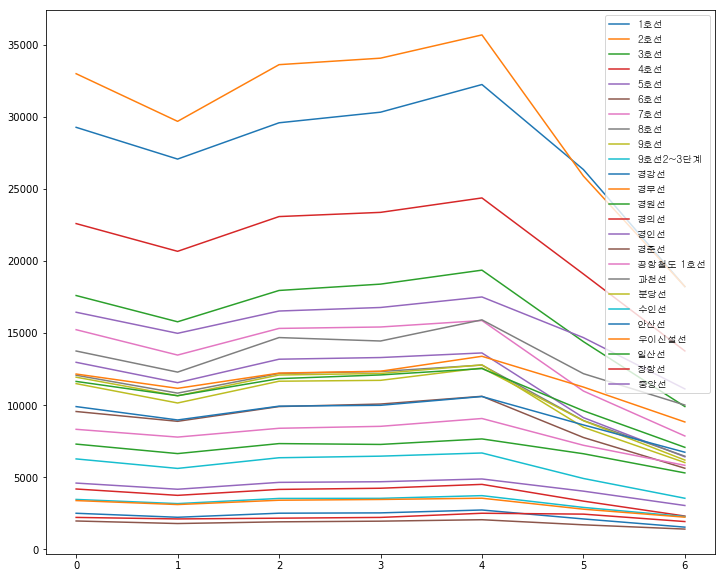

In [53]:
import matplotlib.font_manager as fm
prop=fm.FontProperties(fname='C:/Windows/Fonts/gulim.ttc')

plt.figure(figsize=[12,10])
plt.plot(data2.T)
plt.legend(data2.index.tolist(), prop=prop)

In [6]:
data.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,경춘선,1323,가평,1520,1436,20190104
1,20190101,경춘선,1322,상천,275,114,20190104
2,20190101,경춘선,1321,청평,1509,1083,20190104
3,20190101,경춘선,1320,대성리,357,271,20190104
4,20190101,경춘선,1319,마석,1772,1963,20190104


In [9]:
data.pivot_table(values=['승차총승객수','하차총승객수'], index='사용일자', columns='노선명',
                aggfunc='mean', margins=True)

승차총승객수                                            \
노선명                1호선           2호선           3호선           4호선   
사용일자                                                               
20190101  15295.500000  13624.080000   7108.411765  10613.538462   
20190102  28386.100000  32342.000000  17164.264706  22394.730769   
20190103  29592.500000  33702.840000  17881.382353  23318.000000   
20190104  31664.800000  35276.840000  19443.151515  24231.153846   
20190105  25247.300000  25251.020000  13766.147059  18629.576923   
20190106  17574.400000  17694.240000   9817.727273  13388.692308   
20190107  29460.100000  33224.280000  17652.705882  22749.500000   
20190108  29955.200000  33742.720000  17991.588235  23310.307692   
20190109  28726.100000  33413.940000  18313.939394  22785.269231   
20190110  30103.200000  34152.460000  18661.393939  23337.115385   
20190111  32108.400000  35644.200000  19143.088235  24303.730769   
20190112  26814.400000  26124.620000  14537.470588  19352.884615   
20190113  17741.000000  18251.760000   9758.941176  13693.846154   
20190114  28666.500000  32552.700000  17408.911765  22222.769231   
20190115  29400.600000  33491.860000  17749.470588  22892.115385   
20190116  29605.600000  33897.380000  17923.411765  23047.461538   
20190117  30716.800000  34320.440000  18512.323529  23484.269231   
20190118  32380.400000  35586.860000  19395.941176  24344.269231   
20190119  26445.300000  25834.220000  14579.382353  18944.307692   
20190120  18177.700000  18204.880000  10024.588235  13815.115385   
20190121  29176.800000  32911.780000  17544.529412  22469.769231   
20190122  30385.100000  33846.560000  17992.058824  23197.115385   
20190123  30479.800000  34518.600000  18108.676471  23512.730769   
20190124  30946.700000  34648.280000  18948.727273  23583.461538   
20190125  32804.400000  36225.900000  19456.088235  24601.961538   
20190126  26851.700000  26342.380000  14711.441176  19448.000000   
20190127  19390.400000  18731.140000   9972.705882  14107.576923   
20190128  29776.700000  33275.400000  17783.794118  22917.730769   
20190129  30298.700000  33719.620000  18035.676471  23317.230769   
20190130  30727.100000  33922.580000  18246.264706  23645.807692   
20190131  30242.600000  33520.920000  17966.588235  23120.192308   
All       27714.254839  30257.951613  16306.236416  21121.942928   

                                                                  \
노선명                5호선           6호선           7호선           8호선   
사용일자                                                               
20190101   4885.941176   4410.684211   5844.882353   5008.235294   
20190102  12758.666667   9424.236842  14909.098039  11785.882353   
20190103  13137.647059  10095.918919  15274.019608  12094.882353   
20190104  13534.058824  10527.513514  15751.156863  12827.000000   
20190105   8932.529412   7642.648649  10723.843137   8723.294118   
20190106   6294.450980   5461.552632   7644.509804   6364.588235   
20190107  13041.627451   9655.315789  15350.176471  12094.764706   
20190108  13252.882353  10106.756757  15371.843137  12274.882353   
20190109  13081.156863   9701.710526  15279.411765  12249.000000   
20190110  13292.039216  10153.648649  15451.725490  12301.882353   
20190111  13584.215686  10570.783784  15870.549020  12731.411765   
20190112   9114.764706   7729.815789  11068.254902   8818.882353   
20190113   6256.019608   5505.631579   7859.431373   6386.176471   
20190114  12824.117647   9455.421053  15112.313725  12082.352941   
20190115  13116.607843   9998.216216  15267.803922  12101.705882   
20190116  13198.431373  10118.000000  15289.607843  12198.294118   
20190117  13392.078431  10021.552632  15477.058824  12339.352941   
20190118  13609.235294  10662.459459  15855.921569  12686.411765   
20190119   9155.882353   7646.894737  10985.784314   9124.823529   
20190120   6369.862745   5679.105263   7980.666667   6499.882353   
20190121  12898.549020   9456.947368  15122.705882  11942.882353   
201

### 타임시리즈

In [11]:
from datetime import datetime

In [19]:
t = datetime.strptime('20190301','%Y%m%d')
t

datetime.datetime(2019, 3, 1, 0, 0)

In [25]:
t.strftime('%Y-%m(%b, %B)-%d %w(%a, %A) %p, %x')

'2019-03(Mar, March)-01 5(Fri, Friday) AM, 03/01/19'

In [27]:
di = pd.to_datetime(['2019/3/1', '2019/3/2', '2019/3/3'])
type(di)

pandas.core.indexes.datetimes.DatetimeIndex

In [30]:
t = pd.Series(di)
t

0   2019-03-01
1   2019-03-02
2   2019-03-03
dtype: datetime64[ns]

In [33]:
t[0]

Timestamp('2019-03-01 00:00:00')

In [35]:
pd.date_range('2019/1/1','2019/1/31')

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31'],
              dtype='datetime64[ns]', freq='D')

In [36]:
help(pd.to_datetime)

Help on function to_datetime in module pandas.core.tools.datetimes:

to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=None, box=True, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=False)
    Convert argument to datetime.
    
    Parameters
    ----------
    arg : integer, float, string, datetime, list, tuple, 1-d array, Series
    
        .. versionadded:: 0.18.1
    
           or DataFrame/dict-like
    
    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
    
        - If 'raise', then invalid parsing will raise an exception
        - If 'coerce', then invalid parsing will be set as NaT
        - If 'ignore', then invalid parsing will return the input
    dayfirst : boolean, default False
        Specify a date parse order if `arg` is str or its list-likes.
        If True, parses dates with the day first, eg 10/11/12 is parsed as
        2012-11-10.
        with day first (this is a known bug, based on dateutil

In [38]:
t = pd.to_datetime([20190101, 20190102], format='%Y%m%d')
t.resample('D')

AttributeError: 'DatetimeIndex' object has no attribute 'resample'

In [39]:
help(pd.Series.resample)

Help on function resample in module pandas.core.generic:

resample(self, rule, how=None, axis=0, fill_method=None, closed=None, label=None, convention='start', kind=None, loffset=None, limit=None, base=0, on=None, level=None)
    Convenience method for frequency conversion and resampling of time
    series.  Object must have a datetime-like index (DatetimeIndex,
    PeriodIndex, or TimedeltaIndex), or pass datetime-like values
    to the on or level keyword.
    
    Parameters
    ----------
    rule : string
        the offset string or object representing target conversion
    axis : int, optional, default 0
    closed : {'right', 'left'}
        Which side of bin interval is closed. The default is 'left'
        for all frequency offsets except for 'M', 'A', 'Q', 'BM',
        'BA', 'BQ', and 'W' which all have a default of 'right'.
    label : {'right', 'left'}
        Which bin edge label to label bucket with. The default is 'left'
        for all frequency offsets except for 'M'

In [42]:
data2 = data.copy()
data2['day'] = pd.to_datetime(data2.사용일자, format='%Y%m%d')
data2.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,day
0,20190101,경춘선,1323,가평,1520,1436,20190104,2019-01-01
1,20190101,경춘선,1322,상천,275,114,20190104,2019-01-01
2,20190101,경춘선,1321,청평,1509,1083,20190104,2019-01-01
3,20190101,경춘선,1320,대성리,357,271,20190104,2019-01-01
4,20190101,경춘선,1319,마석,1772,1963,20190104,2019-01-01


In [48]:
data2.resample('D', on='day').mean()

,사용일자,역ID,승차총승객수,하차총승객수,등록일자
day,,,,,
2019-01-01,20190101.0,1882.940878,5776.939189,5732.271959,20190104.0
2019-01-02,20190102.0,1882.954392,12874.439189,12824.888514,20190105.0
2019-01-03,20190103.0,1879.278246,13277.726813,13225.161889,20190106.0
2019-01-04,20190104.0,1883.898305,14017.533898,13964.298305,20190107.0
2019-01-05,20190105.0,1884.156197,10292.519525,10237.760611,20190108.0
2019-01-06,20190106.0,1887.045763,7472.403390,7424.657627,20190109.0
2019-01-07,20190107.0,1882.947635,13216.939189,13166.797297,20190110.0
2019-01-08,20190108.0,1881.712352,13389.445008,13333.705584,20190111.0
2019-01-09,20190109.0,1887.143824,13224.035533,13169.321489,20190112.0


In [47]:
data2.groupby('day').mean()

,사용일자,역ID,승차총승객수,하차총승객수,등록일자
day,,,,,
2019-01-01,20190101.0,1882.940878,5776.939189,5732.271959,20190104.0
2019-01-02,20190102.0,1882.954392,12874.439189,12824.888514,20190105.0
2019-01-03,20190103.0,1879.278246,13277.726813,13225.161889,20190106.0
2019-01-04,20190104.0,1883.898305,14017.533898,13964.298305,20190107.0
2019-01-05,20190105.0,1884.156197,10292.519525,10237.760611,20190108.0
2019-01-06,20190106.0,1887.045763,7472.403390,7424.657627,20190109.0
2019-01-07,20190107.0,1882.947635,13216.939189,13166.797297,20190110.0
2019-01-08,20190108.0,1881.712352,13389.445008,13333.705584,20190111.0
2019-01-09,20190109.0,1887.143824,13224.035533,13169.321489,20190112.0


In [67]:
pd.to_datetime('2019/3/3') + pd.tseries.offsets.MonthEnd(0)

Timestamp('2019-03-31 00:00:00')

In [69]:
pd.to_datetime('2019/3/2') + pd.tseries.offsets.MonthBegin(0)

Timestamp('2019-04-01 00:00:00')

In [65]:
pd.tseries.offsets.MonthEnd(datetime.now())

TypeError: `n` argument must be an integer, got <class 'datetime.datetime'>

### 요일별 노선별 유동승객수를 구해보자

In [152]:
data.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190501,일산선,1955,마두,8528,8796,20190504
1,20190501,일산선,1954,백석,10118,10399,20190504
2,20190501,일산선,1953,대곡,1655,1406,20190504
3,20190501,일산선,1952,화정,20102,20951,20190504
4,20190501,일산선,1951,원당,11419,11064,20190504


In [153]:
pd.to_datetime(data.사용일자, format='%Y%m%d')

0       2019-05-01
1       2019-05-01
2       2019-05-01
3       2019-05-01
4       2019-05-01
5       2019-05-01
6       2019-05-01
7       2019-05-01
8       2019-05-01
9       2019-05-01
10      2019-05-01
11      2019-05-01
12      2019-05-01
13      2019-05-01
14      2019-05-01
15      2019-05-01
16      2019-05-01
17      2019-05-01
18      2019-05-01
19      2019-05-01
20      2019-05-01
21      2019-05-01
22      2019-05-01
23      2019-05-01
24      2019-05-01
25      2019-05-01
26      2019-05-01
27      2019-05-01
28      2019-05-01
29      2019-05-01
           ...    
17716   2019-05-31
17717   2019-05-31
17718   2019-05-31
17719   2019-05-31
17720   2019-05-31
17721   2019-05-31
17722   2019-05-31
17723   2019-05-31
17724   2019-05-31
17725   2019-05-31
17726   2019-05-31
17727   2019-05-31
17728   2019-05-31
17729   2019-05-31
17730   2019-05-31
17731   2019-05-31
17732   2019-05-31
17733   2019-05-31
17734   2019-05-31
17735   2019-05-31
17736   2019-05-31
17737   2019

In [155]:
data2 = data.copy()
data2['요일'] = pd.to_datetime(data.사용일자, format='%Y%m%d').dt.dayofweek
data2

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,요일
0,20190501,일산선,1955,마두,8528,8796,20190504,2
1,20190501,일산선,1954,백석,10118,10399,20190504,2
2,20190501,일산선,1953,대곡,1655,1406,20190504,2
3,20190501,일산선,1952,화정,20102,20951,20190504,2
4,20190501,일산선,1951,원당,11419,11064,20190504,2
5,20190501,일산선,1950,삼송,16289,15724,20190504,2
6,20190501,일산선,1948,원흥,7565,7223,20190504,2
7,20190501,우이신설선,4713,신설동,1868,1879,20190504,2
8,20190501,우이신설선,4712,보문,1619,1575,20190504,2
9,20190501,우이신설선,4711,성신여대입구(돈암),4027,4496,20190504,2


**참고**
```
p = pd.pivot_table(data, values='승차총승객수', index='사용일자', columns='노선명',
                   aggfunc=np.mean).reset_index()

wday={0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
p.insert(1, '요일', pd.to_datetime(p.사용일자, format='%Y%m%d').dt.dayofweek.map(wday))
```

In [157]:
result = pd.pivot_table(data2, values='승차총승객수', index='요일', columns='노선명',
              aggfunc=np.mean) # 교재 418쪽 참조
result

노선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,9호선2~3단계,...,경춘선,공항철도 1호선,과천선,분당선,수인선,안산선,우이신설선,일산선,장항선,중앙선
요일,,,,,,,,,,,,,,,,,,,,,
0,27004.100000,30231.815000,16574.095588,22321.230769,12127.504902,9572.480000,14594.514706,11469.014706,10942.480,6060.788462,...,2248.526316,8313.464286,13427.93750,10834.769784,3714.596154,10593.557692,3475.076923,11805.275000,2879.083333,4952.642857
1,30359.125000,34868.635000,19020.362963,25476.326923,14044.039216,11246.027027,16793.156863,13308.705882,12716.220,6973.250000,...,2400.526316,8837.071429,15544.71875,12611.079137,4227.019231,11625.134615,4008.269231,13340.550000,3113.166667,5478.011905
2,29533.740000,33421.420000,18206.429412,24956.146154,13496.494118,10720.920213,15906.486275,12741.011765,11974.800,6725.969231,...,2312.357895,8546.857143,15681.32500,12201.244186,4179.892308,11333.707692,3870.738462,13001.340000,3001.100000,5352.657143
3,30743.320000,35579.176000,19171.982353,25903.315385,14143.435294,11210.582888,16796.556863,13311.764706,12767.552,7162.953846,...,2409.494737,9116.800000,15935.82500,12752.930636,4269.600000,11736.030769,3977.923077,13503.660000,3289.633333,5534.390476
4,32406.860000,37354.964000,20445.041176,26914.984615,14614.164706,11493.500000,17275.098039,13811.823529,13492.952,7594.800000,...,2549.189474,9839.385714,18050.90000,13450.011628,4530.938462,12311.615385,4025.876923,14095.780000,3558.466667,5795.076190
5,29123.633333,28709.086667,16438.792079,21446.294872,10598.607843,9055.725664,12411.287582,10242.411765,9486.400,6108.205128,...,2489.070175,8379.523810,14335.62500,9621.628571,3524.076923,10081.179487,3256.384615,11499.466667,2822.388889,5016.920635
6,19207.925000,20080.175000,11155.837037,15271.836538,7306.985294,6436.586667,9087.485294,7158.926471,6716.600,4638.576923,...,1949.013158,6840.732143,12009.34375,6902.862319,2649.846154,8002.288462,2684.019231,8424.525000,2330.041667,3759.273810


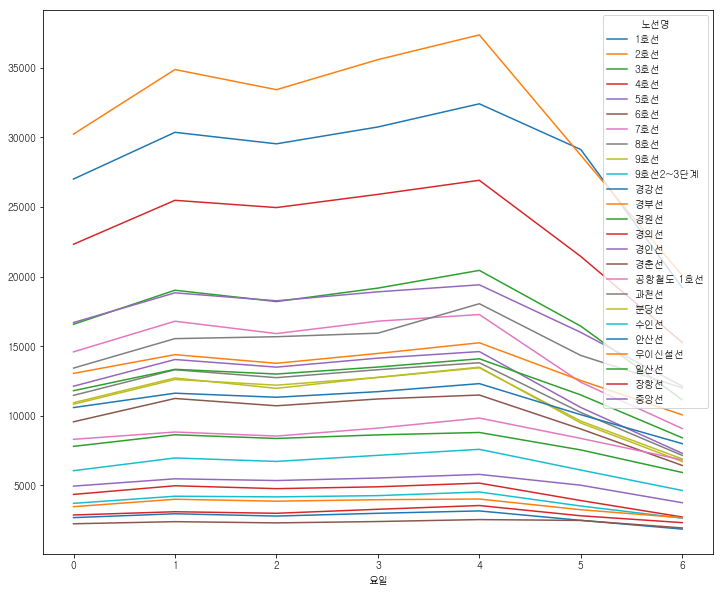

In [159]:
result.plot(figsize=[12,10])

In [162]:
data2.groupby(['요일','노선명']).승차총승객수.mean()

요일  노선명     
0   1호선         27004.100000
    2호선         30231.815000
    3호선         16574.095588
    4호선         22321.230769
    5호선         12127.504902
    6호선          9572.480000
    7호선         14594.514706
    8호선         11469.014706
    9호선         10942.480000
    9호선2~3단계     6060.788462
    경강선          2690.590909
    경부선         13047.980769
    경원선          7806.939655
    경의선          4355.885714
    경인선         16699.025000
    경춘선          2248.526316
    공항철도 1호선     8313.464286
    과천선         13427.937500
    분당선         10834.769784
    수인선          3714.596154
    안산선         10593.557692
    우이신설선        3475.076923
    일산선         11805.275000
    장항선          2879.083333
    중앙선          4952.642857
1   1호선         30359.125000
    2호선         34868.635000
    3호선         19020.362963
    4호선         25476.326923
    5호선         14044.039216
                    ...     
5   안산선         10081.179487
    우이신설선        3256.384615
    일산선         11499.466667
 

In [164]:
data2.groupby(['요일','노선명']).승차총승객수.mean().unstack()

노선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,9호선2~3단계,...,경춘선,공항철도 1호선,과천선,분당선,수인선,안산선,우이신설선,일산선,장항선,중앙선
요일,,,,,,,,,,,,,,,,,,,,,
0,27004.100000,30231.815000,16574.095588,22321.230769,12127.504902,9572.480000,14594.514706,11469.014706,10942.480,6060.788462,...,2248.526316,8313.464286,13427.93750,10834.769784,3714.596154,10593.557692,3475.076923,11805.275000,2879.083333,4952.642857
1,30359.125000,34868.635000,19020.362963,25476.326923,14044.039216,11246.027027,16793.156863,13308.705882,12716.220,6973.250000,...,2400.526316,8837.071429,15544.71875,12611.079137,4227.019231,11625.134615,4008.269231,13340.550000,3113.166667,5478.011905
2,29533.740000,33421.420000,18206.429412,24956.146154,13496.494118,10720.920213,15906.486275,12741.011765,11974.800,6725.969231,...,2312.357895,8546.857143,15681.32500,12201.244186,4179.892308,11333.707692,3870.738462,13001.340000,3001.100000,5352.657143
3,30743.320000,35579.176000,19171.982353,25903.315385,14143.435294,11210.582888,16796.556863,13311.764706,12767.552,7162.953846,...,2409.494737,9116.800000,15935.82500,12752.930636,4269.600000,11736.030769,3977.923077,13503.660000,3289.633333,5534.390476
4,32406.860000,37354.964000,20445.041176,26914.984615,14614.164706,11493.500000,17275.098039,13811.823529,13492.952,7594.800000,...,2549.189474,9839.385714,18050.90000,13450.011628,4530.938462,12311.615385,4025.876923,14095.780000,3558.466667,5795.076190
5,29123.633333,28709.086667,16438.792079,21446.294872,10598.607843,9055.725664,12411.287582,10242.411765,9486.400,6108.205128,...,2489.070175,8379.523810,14335.62500,9621.628571,3524.076923,10081.179487,3256.384615,11499.466667,2822.388889,5016.920635
6,19207.925000,20080.175000,11155.837037,15271.836538,7306.985294,6436.586667,9087.485294,7158.926471,6716.600,4638.576923,...,1949.013158,6840.732143,12009.34375,6902.862319,2649.846154,8002.288462,2684.019231,8424.525000,2330.041667,3759.273810


In [165]:
data2.groupby(['요일','노선명']).승차총승객수.mean().to_frame().reset_index()

,요일,노선명,승차총승객수
0,0,1호선,27004.100000
1,0,2호선,30231.815000
2,0,3호선,16574.095588
3,0,4호선,22321.230769
4,0,5호선,12127.504902
5,0,6호선,9572.480000
6,0,7호선,14594.514706
7,0,8호선,11469.014706
8,0,9호선,10942.480000
9,0,9호선2~3단계,6060.788462
